<a href="https://colab.research.google.com/github/spavliga/64061_spavliga/blob/main/Assignment%202-%20Part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ValueError: Mountpoint must not already contain files

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
import os

base_path = "/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small"
print(os.listdir(base_path))


['train', 'validation', 'test', 'cats_vs_dogs_small']


In [ ]:
from pathlib import Path
import shutil
import os
import random

original_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_subset")

subsets = ["train", "validation", "test"]
categories = ["cats", "dogs"]

for subset in subsets:
    for category in categories:
        subset_dir = new_base_dir / subset / category
        if subset_dir.exists():
            shutil.rmtree(subset_dir)
        subset_dir.mkdir(parents=True, exist_ok=True)

def copy_images(subset_name, limit=None):
    for category in categories:
        src_dir = original_dir / subset_name / category
        dst_dir = new_base_dir / subset_name / category

        if not src_dir.exists():
            print(f"{src_dir} does not exist")
            continue

        all_files = sorted(list(src_dir.glob("*.jpg")))
        if limit:
            all_files = random.sample(all_files, min(limit, len(all_files)))

        files_copied = 0
        for file_path in all_files:
            shutil.copy(file_path, dst_dir)
            files_copied += 1

        print(f" {subset_name}/{category}: {files_copied} images copied")

copy_images("train", limit=500)
copy_images("validation")
copy_images("test")

 train/cats: 500 images copied
 train/dogs: 500 images copied
 validation/cats: 500 images copied
 validation/dogs: 500 images copied
 test/cats: 500 images copied
 test/dogs: 500 images copied


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
 model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

In [ ]:
 from tensorflow.keras.utils import image_dataset_from_directory
 train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
 validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
 test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="convnet_from_scratch.keras",
      save_best_only=True,
      monitor="val_loss")
 ]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 398ms/step - accuracy: 0.4868 - loss: 0.7760 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - accuracy: 0.5014 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.5593 - loss: 0.6926 - val_accuracy: 0.5240 - val_loss: 0.6915
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.5616 - loss: 0.6850 - val_accuracy: 0.5600 - val_loss: 0.6820
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.5968 - loss: 0.6769 - val_accuracy: 0.6340 - val_loss: 0.6394
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - accuracy: 0.6334 - loss: 0.6381 - val_accuracy: 0.6220 - val_loss: 0.6366
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.6163 - loss: 0.6378 - val_accuracy: 0.6560 - val_loss: 0.6295
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.6610 - loss: 0.6120 - val_accuracy

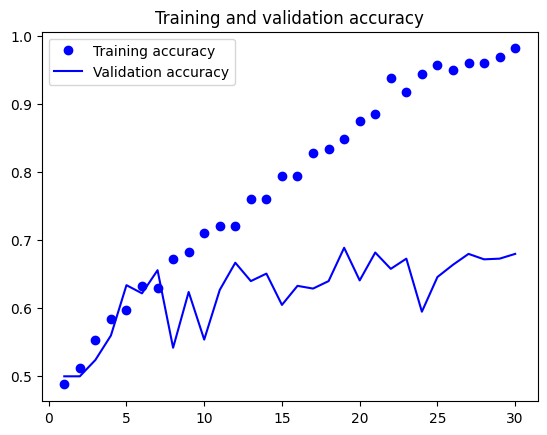

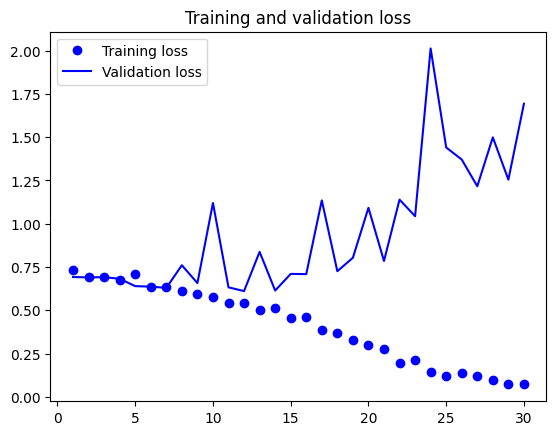

In [ ]:
 import matplotlib.pyplot as plt
 accuracy = history.history["accuracy"]
 val_accuracy = history.history["val_accuracy"]
 loss = history.history["loss"]
 val_loss = history.history["val_loss"]
 epochs = range(1, len(accuracy) + 1)
 plt.plot(epochs, accuracy, "bo", label="Training accuracy")
 plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
 plt.title("Training and validation accuracy")
 plt.legend()
 plt.figure()
 plt.plot(epochs, loss, "bo", label="Training loss")
 plt.plot(epochs, val_loss, "b", label="Validation loss")
 plt.title("Training and validation loss")
 plt.legend()
 plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6665 - loss: 0.6378
Test accuracy: 0.667


Looks like classic overfitting. using data augmentation + dropout below

In [ ]:
from pathlib import Path
import shutil
import os
import random

original_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_subset")

subsets = ["train", "validation", "test"]
categories = ["cats", "dogs"]

for subset in subsets:
    for category in categories:
        subset_dir = new_base_dir / subset / category
        if subset_dir.exists():
            shutil.rmtree(subset_dir)
        subset_dir.mkdir(parents=True, exist_ok=True)

def copy_images(subset_name, limit=None):
    for category in categories:
        src_dir = original_dir / subset_name / category
        dst_dir = new_base_dir / subset_name / category

        if not src_dir.exists():
            print(f"{src_dir} does not exist")
            continue

        all_files = sorted(list(src_dir.glob("*.jpg")))
        if limit:
            all_files = random.sample(all_files, min(limit, len(all_files)))

        files_copied = 0
        for file_path in all_files:
            shutil.copy(file_path, dst_dir)
            files_copied += 1

        print(f" {subset_name}/{category}: {files_copied} images copied")

copy_images("train", limit=500)
copy_images("validation")
copy_images("test")

 train/cats: 500 images copied
 train/dogs: 500 images copied
 validation/cats: 500 images copied
 validation/dogs: 500 images copied
 test/cats: 500 images copied
 test/dogs: 500 images copied


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

In [ ]:
 from tensorflow.keras.utils import image_dataset_from_directory
 train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
 validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
 test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="convnet_from_scratch.keras",
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 282ms/step - accuracy: 0.5028 - loss: 0.7134 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 234ms/step - accuracy: 0.5150 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.7444
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.5026 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.4906 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.5319 - loss: 0.6958 - val_accuracy: 0.5030 - val_loss: 0.6918
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.5204 - loss: 0.6932 - val_accuracy: 0.5150 - val_loss: 0.6970
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.5490 - loss: 0.6946 - val_accuracy: 0.5550 - val_loss: 0.6990
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.5412 - loss: 0.6924 - val

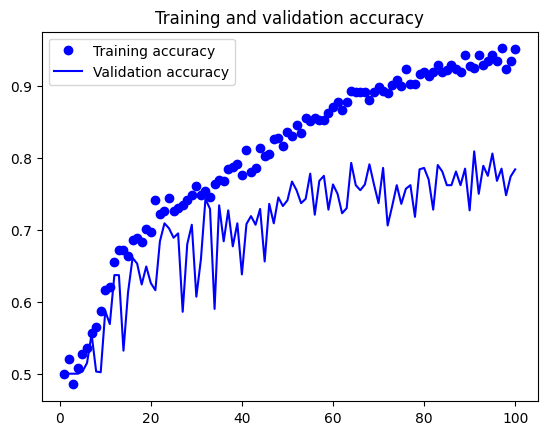

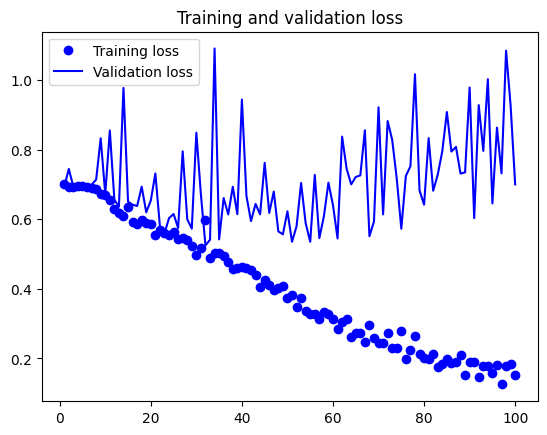

In [ ]:
 import matplotlib.pyplot as plt
 accuracy = history.history["accuracy"]
 val_accuracy = history.history["val_accuracy"]
 loss = history.history["loss"]
 val_loss = history.history["val_loss"]
 epochs = range(1, len(accuracy) + 1)
 plt.plot(epochs, accuracy, "bo", label="Training accuracy")
 plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
 plt.title("Training and validation accuracy")
 plt.legend()
 plt.figure()
 plt.plot(epochs, loss, "bo", label="Training loss")
 plt.plot(epochs, val_loss, "b", label="Validation loss")
 plt.title("Training and validation loss")
 plt.legend()
 plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6803 - loss: 0.6482
Test accuracy: 0.706


While slightly small increase, does appear to be an increase. Worth notice however that training accuracy was still increasing so validation accuracy may have increased with additional epochs.

2. Increase your training sample size. You may pick any amount. Keep the validation and
test samples the same as above. Optimize your network (again training from scratch).
What performance did you achieve?

Changed sample to 750 over 500

In [ ]:
from pathlib import Path
import shutil
import os
import random

original_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_subset")

subsets = ["train", "validation", "test"]
categories = ["cats", "dogs"]

for subset in subsets:
    for category in categories:
        subset_dir = new_base_dir / subset / category
        if subset_dir.exists():
            shutil.rmtree(subset_dir)
        subset_dir.mkdir(parents=True, exist_ok=True)

def copy_images(subset_name, limit=None):
    for category in categories:
        src_dir = original_dir / subset_name / category
        dst_dir = new_base_dir / subset_name / category

        if not src_dir.exists():
            print(f"{src_dir} does not exist")
            continue

        all_files = sorted(list(src_dir.glob("*.jpg")))
        if limit:
            all_files = random.sample(all_files, min(limit, len(all_files)))

        files_copied = 0
        for file_path in all_files:
            shutil.copy(file_path, dst_dir)
            files_copied += 1

        print(f" {subset_name}/{category}: {files_copied} images copied")

copy_images("train", limit=750)
copy_images("validation")
copy_images("test")

 train/cats: 750 images copied
 train/dogs: 750 images copied
 validation/cats: 500 images copied
 validation/dogs: 500 images copied
 test/cats: 500 images copied
 test/dogs: 500 images copied


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

In [ ]:
 from tensorflow.keras.utils import image_dataset_from_directory
 train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
 validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
 test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1500 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="convnet_from_scratch.keras",
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.5288 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.5465 - loss: 0.6900 - val_accuracy: 0.6190 - val_loss: 0.6875
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 0.5845 - loss: 0.6833 - val_accuracy: 0.5580 - val_loss: 0.6711
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.6320 - loss: 0.6676 - val_accuracy: 0.6160 - val_loss: 0.6405
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.6734 - loss: 0.6088 - val_accuracy: 0.6360 - val_loss: 0.6433
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.6951 - loss: 0.5859 - val_accuracy: 0.6690 - val_loss: 0.6166
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.7369 - loss: 0.5724 - val_accuracy: 0.6660 - val_loss: 0.6022
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.7510 - loss: 0.5138 - val_accur

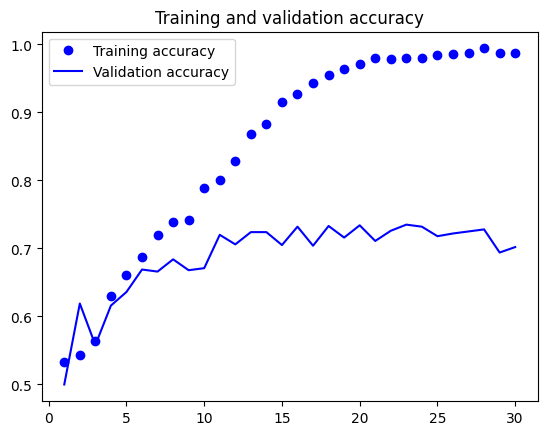

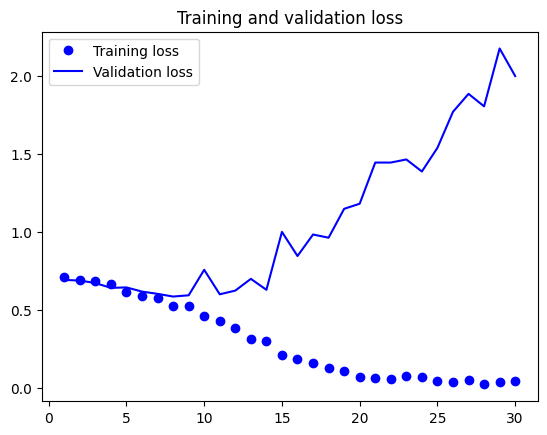

In [ ]:
 import matplotlib.pyplot as plt
 accuracy = history.history["accuracy"]
 val_accuracy = history.history["val_accuracy"]
 loss = history.history["loss"]
 val_loss = history.history["val_loss"]
 epochs = range(1, len(accuracy) + 1)
 plt.plot(epochs, accuracy, "bo", label="Training accuracy")
 plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
 plt.title("Training and validation accuracy")
 plt.legend()
 plt.figure()
 plt.plot(epochs, loss, "bo", label="Training loss")
 plt.plot(epochs, val_loss, "b", label="Validation loss")
 plt.title("Training and validation loss")
 plt.legend()
 plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.6655 - loss: 0.6271
Test accuracy: 0.697


Slight improvement from 500. With data augmentation + dropout

In [ ]:
from pathlib import Path
import shutil
import os
import random

original_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_subset")

subsets = ["train", "validation", "test"]
categories = ["cats", "dogs"]

for subset in subsets:
    for category in categories:
        subset_dir = new_base_dir / subset / category
        if subset_dir.exists():
            shutil.rmtree(subset_dir)
        subset_dir.mkdir(parents=True, exist_ok=True)

def copy_images(subset_name, limit=None):
    for category in categories:
        src_dir = original_dir / subset_name / category
        dst_dir = new_base_dir / subset_name / category

        if not src_dir.exists():
            print(f"{src_dir} does not exist")
            continue

        all_files = sorted(list(src_dir.glob("*.jpg")))
        if limit:
            all_files = random.sample(all_files, min(limit, len(all_files)))

        files_copied = 0
        for file_path in all_files:
            shutil.copy(file_path, dst_dir)
            files_copied += 1

        print(f" {subset_name}/{category}: {files_copied} images copied")

copy_images("train", limit=750)
copy_images("validation")
copy_images("test")

 train/cats: 750 images copied
 train/dogs: 750 images copied
 validation/cats: 500 images copied
 validation/dogs: 500 images copied
 test/cats: 500 images copied
 test/dogs: 500 images copied


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

In [ ]:
 from tensorflow.keras.utils import image_dataset_from_directory
 train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
 validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
 test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1500 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="convnet_from_scratch.keras",
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - accuracy: 0.4819 - loss: 0.7671 - val_accuracy: 0.5000 - val_loss: 0.7290
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.5349 - loss: 0.7145 - val_accuracy: 0.5000 - val_loss: 0.7894
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.5226 - loss: 0.7036 - val_accuracy: 0.4980 - val_loss: 0.6929
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - accuracy: 0.5333 - loss: 0.6937 - val_accuracy: 0.5330 - val_loss: 0.6899
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.5833 - loss: 0.6914 - val_accuracy: 0.6530 - val_loss: 0.6762
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.5971 - loss: 0.6736 - val_accuracy: 0.6220 - val_loss: 0.6550
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.6282 - loss: 0.6504 - val_accuracy: 0.5350 - val_loss: 0.6951
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.6032 - loss: 0.6649 - 

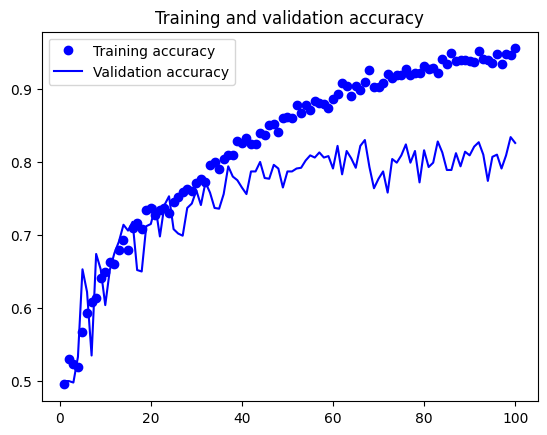

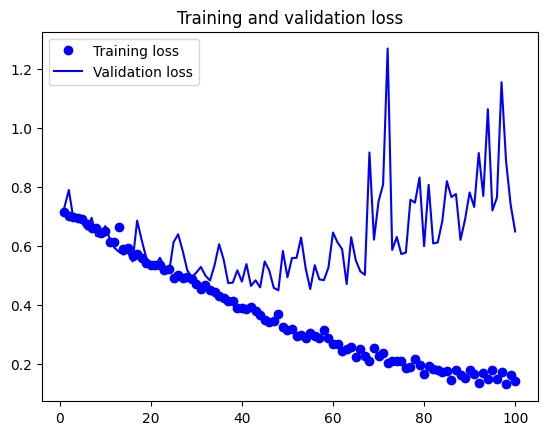

In [ ]:
 import matplotlib.pyplot as plt
 accuracy = history.history["accuracy"]
 val_accuracy = history.history["val_accuracy"]
 loss = history.history["loss"]
 val_loss = history.history["val_loss"]
 epochs = range(1, len(accuracy) + 1)
 plt.plot(epochs, accuracy, "bo", label="Training accuracy")
 plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
 plt.title("Training and validation accuracy")
 plt.legend()
 plt.figure()
 plt.plot(epochs, loss, "bo", label="Training loss")
 plt.plot(epochs, val_loss, "b", label="Validation loss")
 plt.title("Training and validation loss")
 plt.legend()
 plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7679 - loss: 0.4903
Test accuracy: 0.772


considerably higher test accuracy.

3. considering improvement from 500 to 750, will test with full 1000 sample.

In [ ]:
from pathlib import Path
import shutil
import os
import random

original_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_subset")

subsets = ["train", "validation", "test"]
categories = ["cats", "dogs"]

for subset in subsets:
    for category in categories:
        subset_dir = new_base_dir / subset / category
        if subset_dir.exists():
            shutil.rmtree(subset_dir)
        subset_dir.mkdir(parents=True, exist_ok=True)

def copy_images(subset_name, limit=None):
    for category in categories:
        src_dir = original_dir / subset_name / category
        dst_dir = new_base_dir / subset_name / category

        if not src_dir.exists():
            print(f"{src_dir} does not exist")
            continue

        all_files = sorted(list(src_dir.glob("*.jpg")))
        if limit:
            all_files = random.sample(all_files, min(limit, len(all_files)))

        files_copied = 0
        for file_path in all_files:
            shutil.copy(file_path, dst_dir)
            files_copied += 1

        print(f" {subset_name}/{category}: {files_copied} images copied")

copy_images("train", limit=1000)
copy_images("validation")
copy_images("test")

 train/cats: 1000 images copied
 train/dogs: 1000 images copied
 validation/cats: 500 images copied
 validation/dogs: 500 images copied
 test/cats: 500 images copied
 test/dogs: 500 images copied


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="convnet_from_scratch.keras",
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step - accuracy: 0.4906 - loss: 0.7056 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.5187 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.5524 - loss: 0.6912 - val_accuracy: 0.5570 - val_loss: 0.6734
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.6102 - loss: 0.6629 - val_accuracy: 0.6690 - val_loss: 0.6272
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.6698 - loss: 0.6258 - val_accuracy: 0.5780 - val_loss: 0.6516
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.6670 - loss: 0.6009 - val_accuracy: 0.6330 - val_loss: 0.6312
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.6687 - loss: 0.5826 - val_accuracy: 0.6590 - val_loss: 0.5928
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.6886 - loss: 0.5702 - val_accu

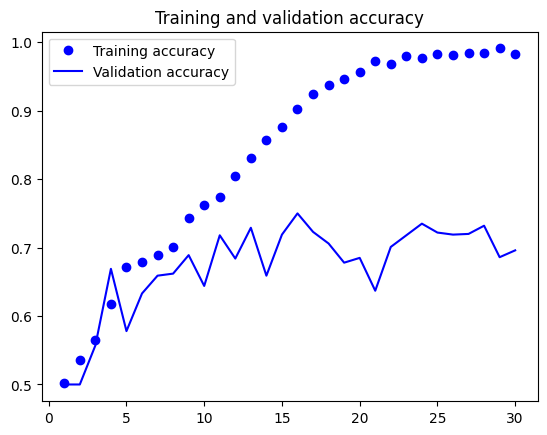

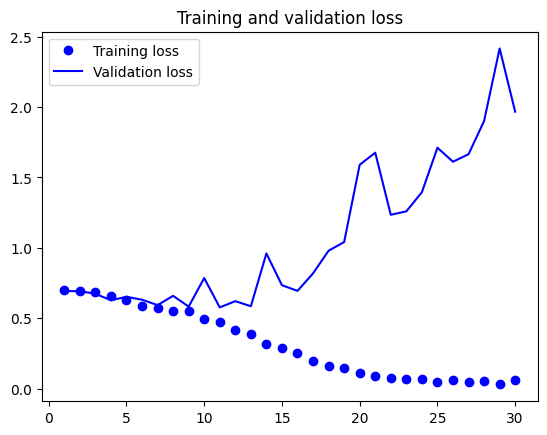

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.7233 - loss: 0.6411
Test accuracy: 0.704


In [ ]:
from pathlib import Path
import shutil
import os
import random

original_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_subset")

subsets = ["train", "validation", "test"]
categories = ["cats", "dogs"]

for subset in subsets:
    for category in categories:
        subset_dir = new_base_dir / subset / category
        if subset_dir.exists():
            shutil.rmtree(subset_dir)
        subset_dir.mkdir(parents=True, exist_ok=True)

def copy_images(subset_name, limit=None):
    for category in categories:
        src_dir = original_dir / subset_name / category
        dst_dir = new_base_dir / subset_name / category

        if not src_dir.exists():
            print(f"{src_dir} does not exist")
            continue

        all_files = sorted(list(src_dir.glob("*.jpg")))
        if limit:
            all_files = random.sample(all_files, min(limit, len(all_files)))

        files_copied = 0
        for file_path in all_files:
            shutil.copy(file_path, dst_dir)
            files_copied += 1

        print(f" {subset_name}/{category}: {files_copied} images copied")

copy_images("train", limit=1000)
copy_images("validation")
copy_images("test")

 train/cats: 1000 images copied
 train/dogs: 1000 images copied
 validation/cats: 500 images copied
 validation/dogs: 500 images copied
 test/cats: 500 images copied
 test/dogs: 500 images copied


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="convnet_from_scratch.keras",
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=120,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - accuracy: 0.5198 - loss: 0.7598 - val_accuracy: 0.4990 - val_loss: 0.7124
Epoch 2/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.5490 - loss: 0.6914 - val_accuracy: 0.5110 - val_loss: 0.6910
Epoch 3/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.5633 - loss: 0.6920 - val_accuracy: 0.5050 - val_loss: 0.6851
Epoch 4/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.5682 - loss: 0.6886 - val_accuracy: 0.5950 - val_loss: 0.6524
Epoch 5/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.6176 - loss: 0.6643 - val_accuracy: 0.6420 - val_loss: 0.6462
Epoch 6/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.6395 - loss: 0.6329 - val_accuracy: 0.5660 - val_loss: 0.6678
Epoch 7/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.6324 - loss: 0.6535 - val_accuracy: 0.6700 - val_loss: 0.6007
Epoch 8/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.6582 - loss: 0.6117 - 

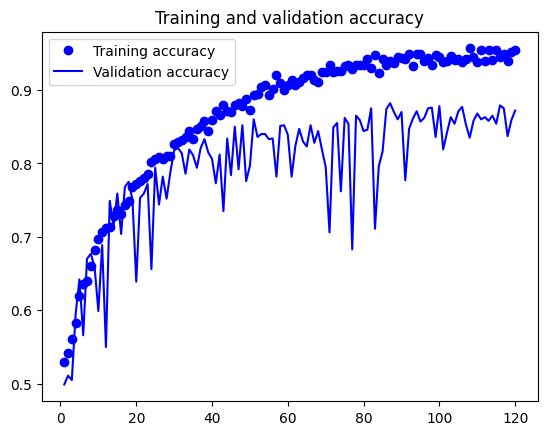

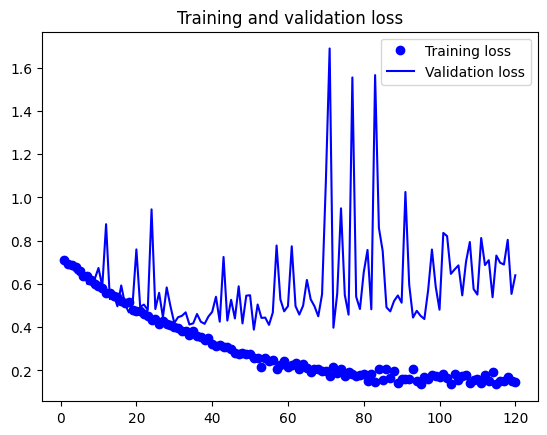

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.8612 - loss: 0.3618
Test accuracy: 0.837


Better test accuracy.

4

In [ ]:
from pathlib import Path
import shutil
import os
import random

original_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_subset")

subsets = ["train", "validation", "test"]
categories = ["cats", "dogs"]

for subset in subsets:
    for category in categories:
        subset_dir = new_base_dir / subset / category
        if subset_dir.exists():
            shutil.rmtree(subset_dir)
        subset_dir.mkdir(parents=True, exist_ok=True)

def copy_images(subset_name, limit=None):
    for category in categories:
        src_dir = original_dir / subset_name / category
        dst_dir = new_base_dir / subset_name / category

        if not src_dir.exists():
            print(f"{src_dir} does not exist")
            continue

        all_files = sorted(list(src_dir.glob("*.jpg")))
        if limit:
            all_files = random.sample(all_files, min(limit, len(all_files)))

        files_copied = 0
        for file_path in all_files:
            shutil.copy(file_path, dst_dir)
            files_copied += 1

        print(f" {subset_name}/{category}: {files_copied} images copied")

copy_images("train")
copy_images("validation")
copy_images("test")

/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small/train/cats does not exist
/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small/train/dogs does not exist
/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small/validation/cats does not exist
/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small/validation/dogs does not exist
/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small/test/cats does not exist
/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small/cats_vs_dogs_small/test/dogs does not exist


In [ ]:
 conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

NameError: name 'keras' is not defined

In [ ]:
conv_base.summary()

NameError: name 'conv_base' is not defined

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
      preprocessed_images = keras.applications.vgg16.preprocess_input(images)
      features = conv_base.predict(preprocessed_images)
      all_features.append(features)
      all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━

In [ ]:
train_features.shape

(512, 5, 5, 512)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7800 - loss: 36.8528 - val_accuracy: 0.9540 - val_loss: 5.9031
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9723 - loss: 2.7195 - val_accuracy: 0.9640 - val_loss: 3.9529
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9911 - loss: 0.8020 - val_accuracy: 0.9620 - val_loss: 6.1070
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9932 - loss: 0.3878 - val_accuracy: 0.9730 - val_loss: 3.7040
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9905 - loss: 1.9733 - val_accuracy: 0.9690 - val_loss: 3.8388
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9927 - loss: 0.5115 - val_accuracy: 0.9730 - val_loss: 3.9249
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9861 - loss: 1.6103 - val_accuracy: 0.9750 - val_loss: 4.0630
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9949 - loss: 0.2052 - val_accuracy: 0.9690 - 

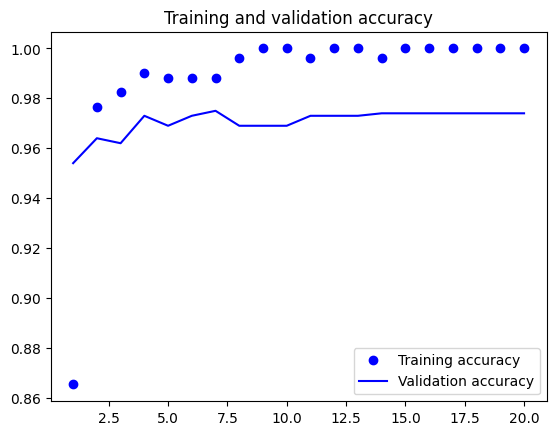

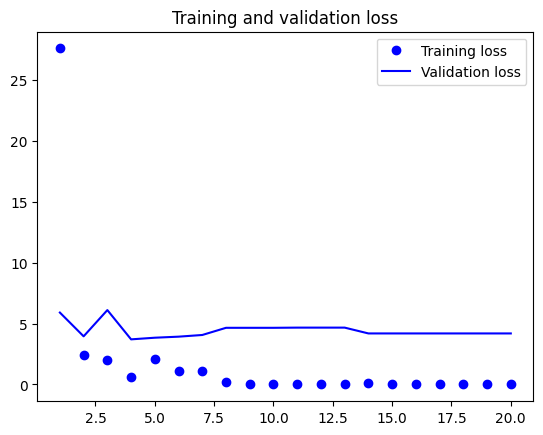

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()